# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [3]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 7. 

Модель Random Forest при обучении дает такой метод как feature importance. Используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияние на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

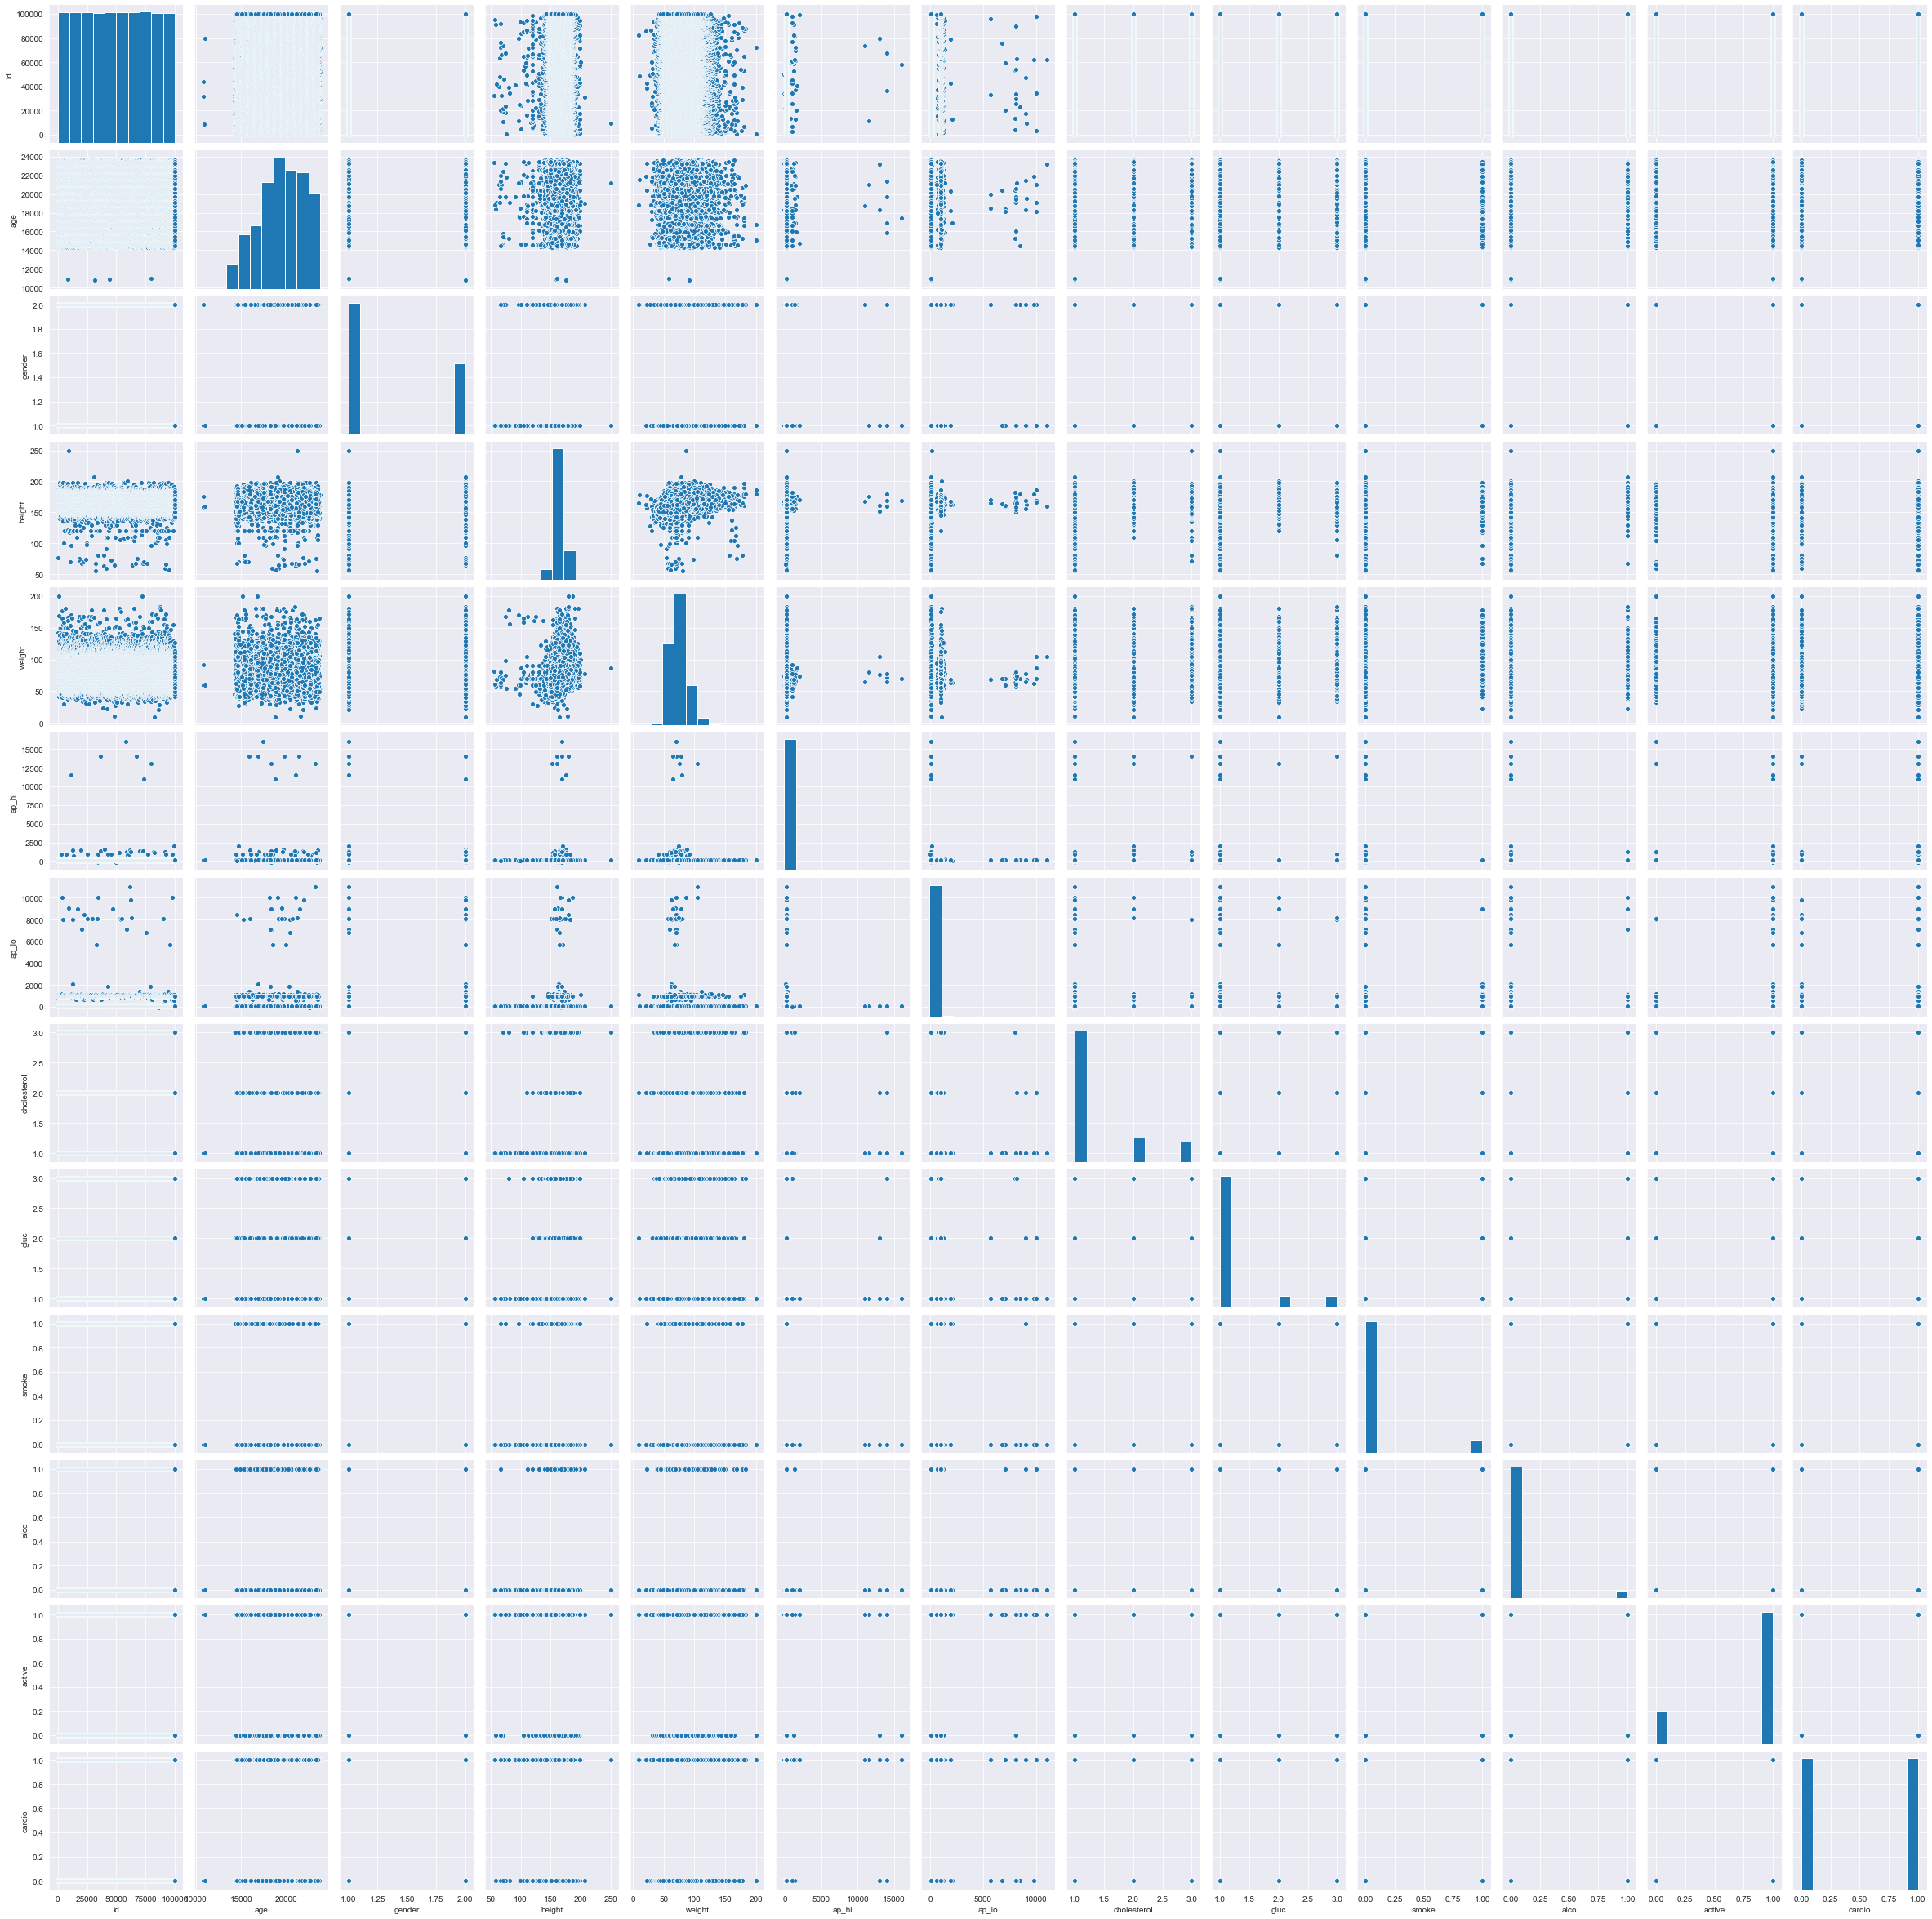

In [7]:
sns.pairplot(data)

In [4]:
# Почистим датасет от выбросов
data2 = data.loc[(data['age'] > 12000) & (data['height'] < 230)]
data2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


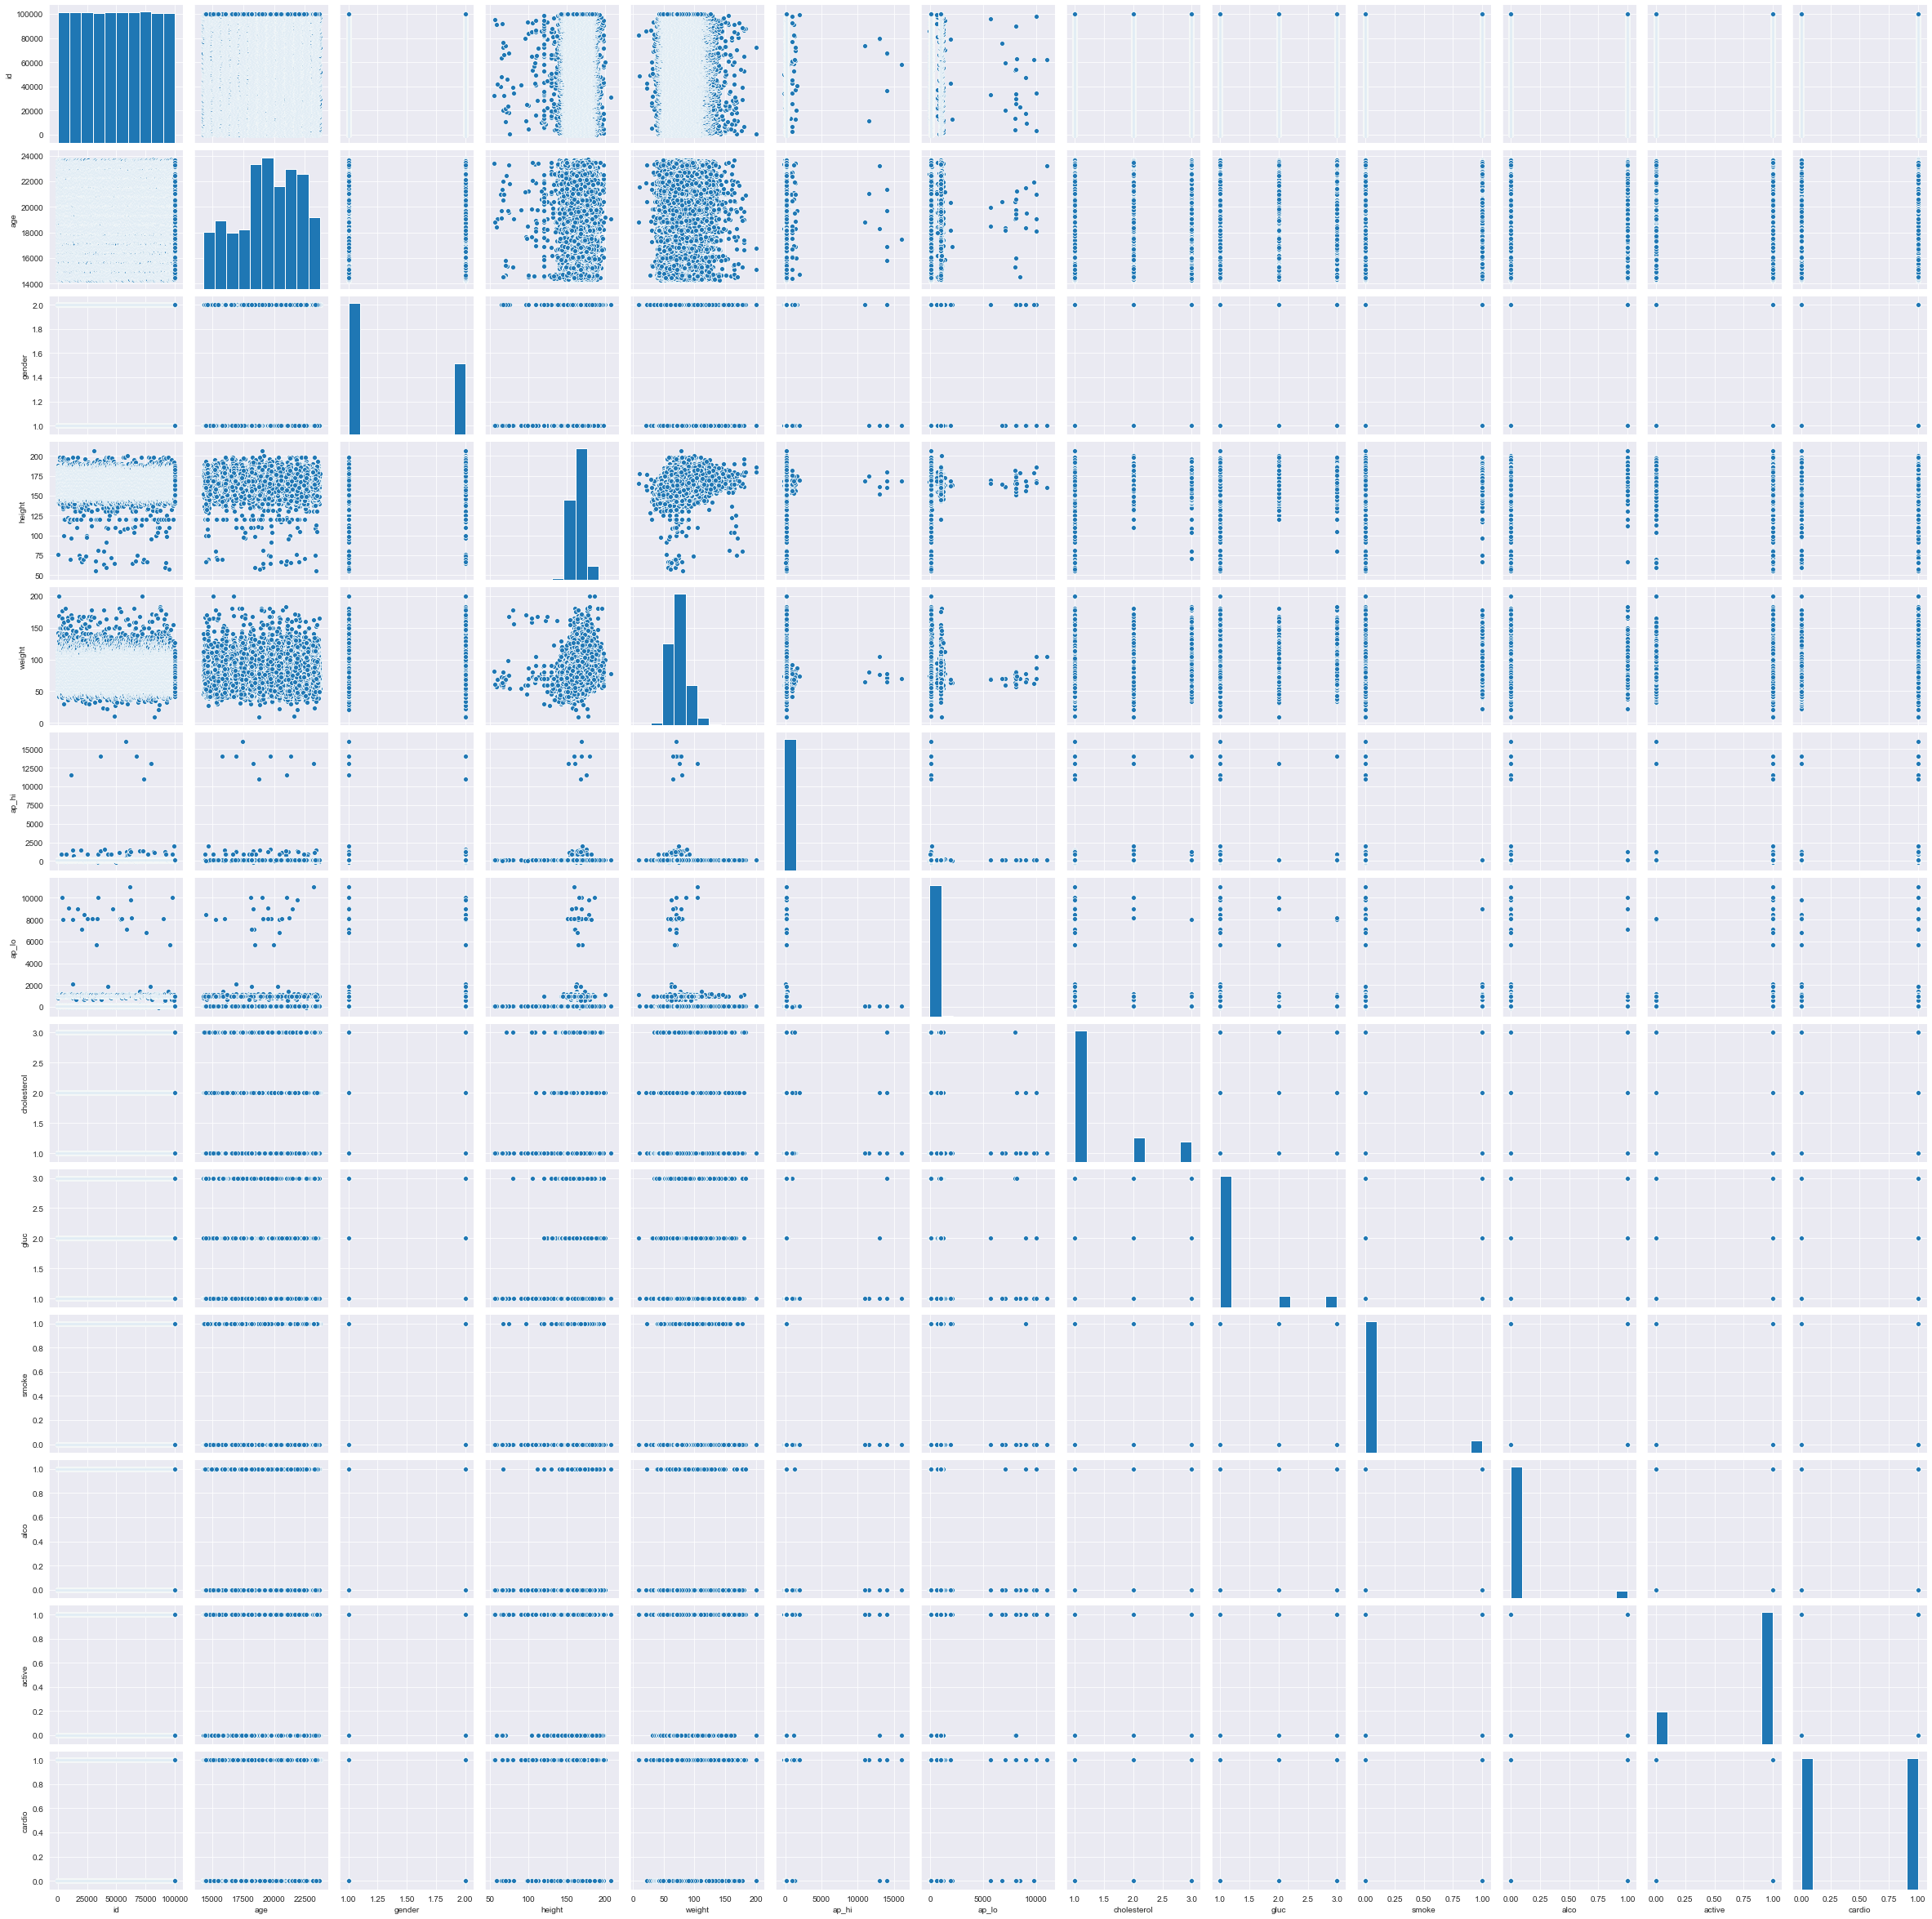

In [10]:
sns.pairplot(data2)

In [5]:
output_y = data2.iloc[:,12:]
input_x = data2.iloc[:,:12]

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
Y=le.fit_transform(output_y)
Y=np.ravel(Y)

In [8]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [9]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

In [12]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10489
           1       0.74      0.70      0.72     10510

    accuracy                           0.73     20999
   macro avg       0.73      0.73      0.73     20999
weighted avg       0.73      0.73      0.73     20999



0.725748845183104

Модель "рандомных деревьев" дала точность предсказания порядка 73%.

No handles with labels found to put in legend.


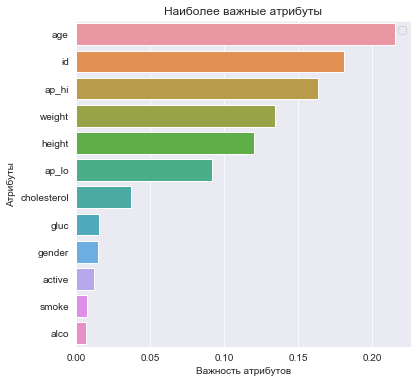

In [10]:
import seaborn as sns
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Итак, можно сделать вывод о том, что **возраст** оказывает значительное влияение на наличие или отсутствие болезни.

Проверим гипотезу о том, что люди старшего возраста болеют чаще сердечным заболеванием

Возьмем выборку людей младше 18250 дней (50 лет) по параметру 'cardio'

Нулевая гипотеза - среднее значение выборки равно среднему значению выборки оставшихся людей.

In [52]:
cardio_y = data2[data2['age']<18250]['cardio']
cardio_ol = data2[data2['age']>=18250]['cardio']
stats.ttest_1samp(cardio_y, cardio_ol.mean())

Ttest_1sampResult(statistic=-57.49780517655924, pvalue=0.0)

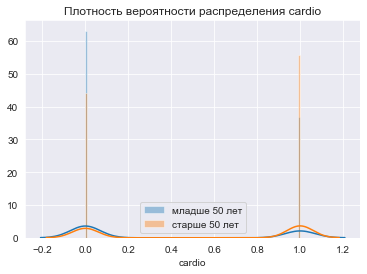

In [53]:
cardio_y = data2[data2['age']<18250]['cardio']
cardio_ol = data2[data2['age']>=18250]['cardio']
sns.distplot(cardio_y, 100)
sns.distplot(cardio_ol, 100)
plt.title('Плотность вероятности распределения cardio')
plt.legend(['младше 50 лет', 'старше 50 лет'])
plt.show()

In [54]:
import researchpy as rp

descriptives, results = rp.ttest(cardio_y, cardio_ol)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  21405.0  0.368138  0.482310  0.003297   0.361677  0.374600
1    cardio  48590.0  0.557687  0.496666  0.002253   0.553271  0.562103
2  combined  69995.0  0.499721  0.500003  0.001890   0.496017  0.503426
_____________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.1895
1            Degrees of freedom =   69993.0000
2                             t =     -46.9321
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.3850
7                     Hedge's g =      -0.3850
8                 Glass's delta =      -0.3930
9                             r =       0.1747


p value = 0.0000, поэтому по количеству сердечных заболеваний отличие людей младше 50 лет от людей старше 50 лет значительное